In [40]:
%cd maze-dataset
!pip install -r requirements.txt


[WinError 2] 지정된 파일을 찾을 수 없습니다: 'maze-dataset'
c:\Users\sean2\바탕 화면\workspace\mdp\maze-dataset


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [41]:
!pip install jaxtyping

In [60]:
from maze_dataset import MazeDataset, MazeDatasetConfig
from maze_dataset.generation import LatticeMazeGenerators

grid_n = 5
cfg = MazeDatasetConfig(
    name="fixed_start_end_example",
    grid_n=grid_n,            # 미로 크기 (5x5)
    n_mazes=4,                # 미로 4개 생성
    maze_ctor=LatticeMazeGenerators.gen_dfs,  # DFS 기반 미로 생성
    maze_ctor_kwargs=dict(do_forks=True),     # fork(분기) 허용 여부
    endpoint_kwargs=dict(
        allowed_start=[(0, 0)],                   # 왼쪽 위 (0,0) 고정
        allowed_end=[(grid_n - 1, grid_n - 1)],   # 오른쪽 아래 (4,4) 고정
        # 필요 시 deadend_start=True 등 옵션도 가능
    ),
)

dataset = MazeDataset.from_config(cfg)

# 실제 미로 하나 확인
m = dataset[0]
print(m.as_ascii(show_endpoints=True))  # ASCII 형태로 시각화


###########
#SXXXX  # #
# ###X# # #
#   #X#   #
#####X#####
#XXXXX#   #
#X### ### #
#X#     # #
#X####### #
#XXXXXXXXE#
###########


In [57]:
# visual representation as ascii art
print(m.as_ascii())

#####################
# # # # # # # # # # #
#####################
# # # # # # # # #XXX#
#################X#X#
# # # # # # # # #X#X#
#################X#X#
# # # #XXXXXXXXXXX#E#
#######X########### #
# #XXXXX#     # # # #
###X######### ##### #
# #XXXXXXXXX#   # # #
###########X### ### #
# # # #SXXXX# #     #
#####################
# # # # # # # # # # #
#####################
# # # # # # # # # # #
#####################
# # # # # # # # # # #
#####################


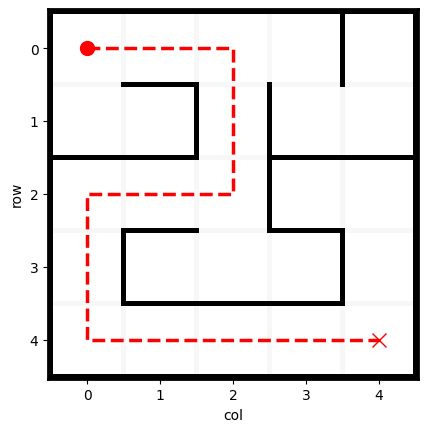

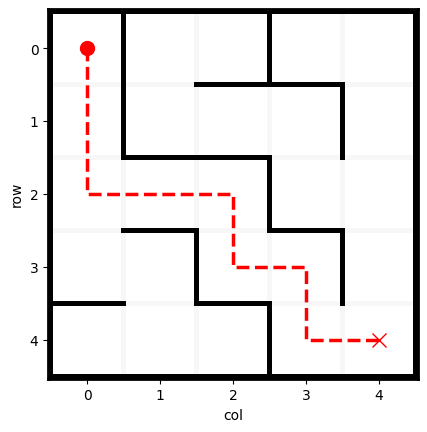

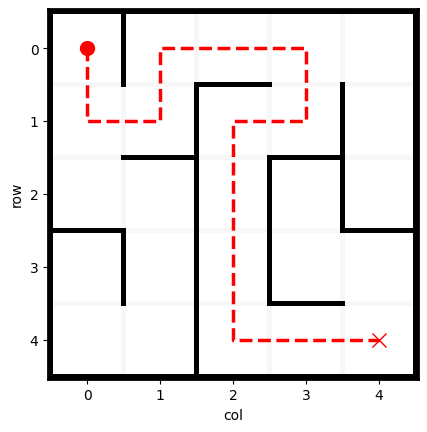

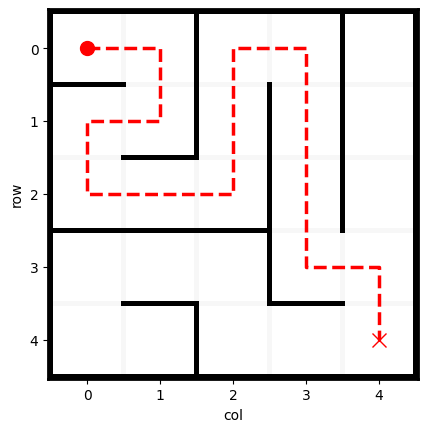

In [61]:
from maze_dataset.plotting import MazePlot
for maze in dataset:
    MazePlot(maze).plot()

In [59]:
!pip install matplotlib